# **Optimización - Actividad 2**
![researchgate-logo.png](https://www.uninorte.edu.co/Uninorte/images/topbar_un/headerlogo_un.png)



*   Estudiante: Alejandro Jesús Manotas Marmolejo
*   Código: 200108289



## Dixon-Price

Considere la función Dixon-Price: [enlace](https://www.sfu.ca/~ssurjano/dixonpr.html)

\begin{eqnarray}
f({\bf x}) = (x_1-1)^2 +\sum_{i=2}^n i \cdot (2 \cdot x_i^2-x_{i-1})^2 \,.
\end{eqnarray}

Deseamos resolver el problema de optimización:
\begin{eqnarray}
{\bf x}^{*} = \arg \underset{{\bf x}}{\min} \, f({\bf x})\,,
\end{eqnarray}
bajo las siguientes condiciones:

1.   Los valores de $n \in \{10^4, 10^5, 10^6, 10^7, 10^8\}$
2.   El valor inicial ${\bf x}_0$, para todos los valores de $n$ es $5 \cdot {\bf 1}_{n}$, en donde ${\bf 1}_{n}$ es un vector de dimensión $n$ cuyas componentes son todas iguales a 1.
3.   Para todos los casos, el número de iteraciones es $50$.

Usted debe:


1.   Implementar de manera eficiente el método de Newton (ej., empleando `scipy.sparse` y `numpy`)
2.   Graficar, para cada caso, la norma del gradiente a través de las iteraciones.
3.   Elabore una gráfica en donde se detalle, para cada valor de $n$, el tiempo promedio empleado en calcular el paso de Newton (ej., puede utilizar el módulo `time`).



### **Respuesta.**

In [1]:
import numpy as np
import scipy.sparse as spa
import scipy.sparse.linalg as las
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, Latex
import sympy as sp
import time as t

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def fun_Dixon(n):
  f = parse_expr('+'.join([f'{i}*(2*x{i}**2-x{i-1})**2' for i in range(1,n)])) + parse_expr('(x_1-1)**2');
  return f

def fun_Gradient(f,x):
  gf = sp.Matrix([sp.diff(f,var) for var in x]);
  return gf;

def fun_Hessian(g,x):
  Hf = sp.Matrix([list(fun_Gradient(fun,x)) for fun in g]);
  return Hf;

In [3]:
n = 6;
fx = fun_Dixon(n);

xs = sp.Matrix([f'x{i}' for i in range(0,n)]);
gx = fun_Gradient(fx,xs);

Hx = fun_Hessian(gx,xs);

# Función de Dixon-Price

In [4]:
display(Latex('f({\\bf x}) = '+sp.latex(fx)));

<IPython.core.display.Latex object>

In [5]:
def dixon_price(x,n):
  f = (x[0]-1)*2+np.sum([i(2*x[i]*2-x[i-1])*2 for i in range(2,n)]);
  return f

# Gradiente de Dixon-Price

In [6]:
display(Latex('\\nabla f({\\bf x}) = '+sp.latex(gx)));

<IPython.core.display.Latex object>

In [7]:
def fun_gradient_Dixon(x,n,multiple_8,multiple_2,multiple_4):
  g = np.zeros(n)
  g[:-1] = np.multiply(multiple_2, x[:-1]) -  np.multiply(multiple_4, x[1:])
  g[1:] += np.multiply(multiple_8, x[1:]) * (2*np.power(x[1:], 2) - x[:-1])
  return g

# Hessiano de Dixon-Price

In [8]:
display(Latex('\\nabla^2 f({\\bf x}) = '+sp.latex(Hx)));

<IPython.core.display.Latex object>

In [9]:
def fun_hessian_Dixon(x,n,multiple_8,multiple_2,multiple_48):
  ds = np.multiply(multiple_8, x[1:]);
  dp = np.zeros(n)
  dp[1:] = np.multiply(multiple_8, x[:-1]) + np.multiply(multiple_48, np.power(x[1:], 2))
  dp[:-1] += multiple_2
  ind = np.arange(0,n);
  I = np.concatenate((ind,ind[:-1],ind[:-1]+1));
  J = np.concatenate((ind,ind[:-1]+1,ind[:-1]));
  V = np.concatenate((dp,ds,ds))
  H = spa.coo_matrix((V,(I,J)));
  return H

# Método de Newton

In [10]:
n = 10**6
numbers = np.array([i for i in range(1,n)])
multiple_8 = 8*numbers
multiple_2 = 2*numbers
multiple_48 = 48*numbers
multiple_4 = 4*numbers

In [11]:
xk = 5*np.ones(n);
norm_gradientK = [];
times = []
for k in range(0,50):
  hessian_k = fun_hessian_Dixon(xk,n,-multiple_8,multiple_2,multiple_48);
  gradient_k = fun_gradient_Dixon(xk,n,multiple_8,multiple_2,multiple_4);
  norm_gradientK.append(np.linalg.norm(gradient_k));
  ini = t.time();
  dxk = las.spsolve(hessian_k,-gradient_k);
  times.append(t.time()-ini);
  xk = xk+dxk;

/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


# Gráfica de la norma de la gradiente

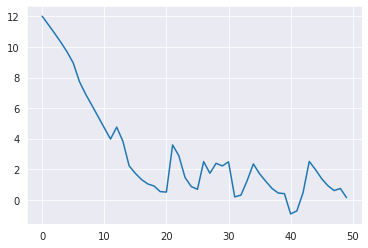

In [12]:
sns.set_style('darkgrid')
plt.plot(np.log10(norm_gradientK));

# Gráfica de los tiempos

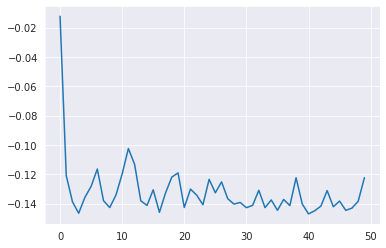

In [13]:
sns.set_style('darkgrid')
plt.plot(np.log10(times));

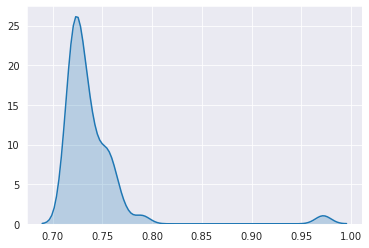

In [14]:
sns.kdeplot(times,shade=True)

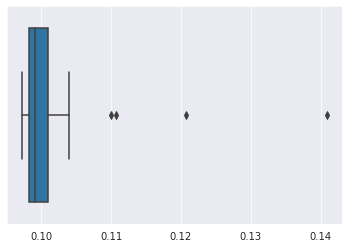

In [27]:
sns.boxplot(times)

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte:

(https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf )